<a href="https://colab.research.google.com/github/doo52oh/Dacon/blob/main/predict_stockprice/stock_list_w4_baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1.주제



KOSPI-200과 KOSDAQ-200의 주어진 기간에 마지막으로 거래된 가격(종가)를 예측하는 경진대회입니다.





## 2.주식 종료 가격 예측 Pre Competition 설명



안녕하세요, 데이커(가칭) 여러분 🤗 (설문조사 링크 : https://dacon.io/forum/404044)

데이커와 함께 만드는 첫 Pre Competition입니다!



주식의 종료 가격을 예측은 도전적인 분야입니다.

따라서 정식 대회로 운영하게 되면 다양한 시행착오가 예상됩니다.

따라서 이번 대회는 데이커와 함께 만들려 합니다. 🥳



"주식 종료 가격 예측 Pre Competition"과 관련해 여러분의 자유로운 의견을 "토크 게시판 [필독]글"에 남겨주세요!

여러분들의 제시한 의견으로 대회가 더 합리적으로 만들고자 합니다.



7월 28일의 KOSPI-200과 KOSDAQ-200에 해당하는 종목들의 종료가격을 예측하는 모델을 만들어 주세요!

대회 중에 데이커 여러분들의 의견을 수렴해, 이후에 정식 대회로 찾아뵙겠습니다!



※ 여러가지 의문점들과 의견들을 토크 게시판에 올려주세요


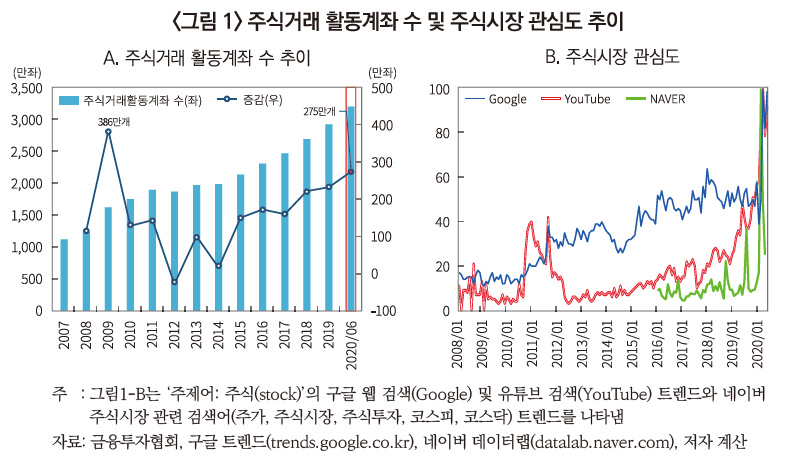


## 3.대회 배경



코로나19 대유행으로 변동성이 높아져 주식 투자에 관심이 많습니다.



주식시장이 급락했던 3월 주식거래 활동계좌1)는 3천만 계좌를 돌파했고2), 올해 6월까지(6/24 기준) 약 275만 개의 활동계좌가 늘어나 2009년 이후 신규 투자자가 가장 많이 유입됐다. 

또한 국내 상위 검색포털의 주식시장 관련 검색이 급격하게 늘어나는 등 사람들 사이에서 주식투자가 유행하고 있는 것으로 보인다. (<그림 1> 참고)



"코로나19 위기와 최근 주식투자 수요 증가에 대한 소고" 자본시장연구원 자료



국립중앙도서관에서 발표한 3년간 금융 관련 도서 대출 현황에 의하면 2018년 상위 50위 도서 중 6권이 주식관련 도서였습니다.

COVID-19 이후에는 14권으로, 2배 이상 증가했습니다.

(국립중앙도서관, “공공도서관 금융 관련 도서 대출 현황 결과 발표”, 2021-04-23)



또한 최근 암호화폐 시장에서 다시 국내 주식 시장으로 모이는 분위기라고 합니다.

(강창욱, “코인에서 주식시장으로 투자자 돈 다시 몰린다”, 국민일보, 2021-06-07)



이런 상황 속에서, 주식의 종료 가격을 정확하게 예측할 수 있다면 어떨까요?

지금까지 실행된 다양한 시계열 대회를 참고해 자신만의 모델을 만들어 보세요!





## 4. 주최 / 주관



주최 : DACON

주관 : DACON

In [59]:
# ! pip install finance-datareader

In [60]:
import pandas as pd
import numpy as np
import os
import FinanceDataReader as fdr
from sklearn.linear_model import LinearRegression
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

In [61]:
# read stock code, list

# path = './open'
list_name = 'Stock_List.csv'
sample_name = 'sample_submission_week4.csv'

# stock_list = pd.read_csv(os.path.join(path,list_name))
stock_list = pd.read_csv(list_name)
sample_submission = pd.read_csv(sample_name)
stock_list['종목코드'] = stock_list['종목코드'].apply(lambda x : str(x).zfill(6))
stock_list

,종목명,종목코드,상장시장
0,삼성전자,005930,KOSPI
1,SK하이닉스,000660,KOSPI
2,NAVER,035420,KOSPI
3,카카오,035720,KOSPI
4,삼성바이오로직스,207940,KOSPI
...,...,...,...
371,더네이쳐홀딩스,298540,KOSDAQ
372,코엔텍,029960,KOSDAQ
373,원익홀딩스,030530,KOSDAQ
374,웹케시,053580,KOSDAQ


In [62]:
stock_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376 entries, 0 to 375
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   종목명     376 non-null    object
 1   종목코드    376 non-null    object
 2   상장시장    376 non-null    object
dtypes: object(3)
memory usage: 8.9+ KB


## Get Data & Modeling

In [63]:
start_date = '20210104'
end_date = '20211001'

start_weekday = pd.to_datetime(start_date).weekday()
max_weeknum = pd.to_datetime(end_date).strftime('%V')
Business_days = pd.DataFrame(pd.date_range(start_date,end_date,freq='B'), columns = ['Date'])

print(f'WEEKDAY of "start_date" : {start_weekday}')
print(f'NUM of WEEKS to "end_date" : {max_weeknum}')
print(f'HOW MANY "Business_days" : {Business_days.shape}', )
display(Business_days.head())

WEEKDAY of "start_date" : 0
NUM of WEEKS to "end_date" : 39
HOW MANY "Business_days" : (195, 1)


,Date
0,2021-01-04
1,2021-01-05
2,2021-01-06
3,2021-01-07
4,2021-01-08



## Baseline 모델의 구성 소개 ( Sample )

* X : (월 ~ 금) * 33주간
* y : (다음주 월 ~ 금) * 33주간
* y_0 : 다음주 월요일
* y_1 : 다음주 화요일
* y_2 : 다음주 수요일
* y_3 : 다음주 목요일
* y_4 : 다음주 금요일
* 이번주 월~금요일의 패턴을 학습해 다음주 월요일 ~ 금요일을 각각 예측하는 모델을 생성

* 이 과정을 모든 종목(376개)에 적용

In [64]:
sample_code = stock_list.loc[0,'종목코드']

sample = fdr.DataReader(sample_code, start = start_date, end = end_date)[['Close']].reset_index()
sample = pd.merge(Business_days, sample, how = 'outer')
sample['weekday'] = sample.Date.apply(lambda x : x.weekday())
sample['weeknum'] = sample.Date.apply(lambda x : x.strftime('%V'))
sample.Close = sample.Close.ffill()
sample = pd.pivot_table(data = sample, values = 'Close', columns = 'weekday', index = 'weeknum')
sample.head()

weekday,0,1,2,3,4
weeknum,,,,,
01,83000.0,83900.0,82200.0,82900.0,88800.0
02,91000.0,90600.0,89700.0,89700.0,88000.0
03,85000.0,87000.0,87200.0,88100.0,86800.0
04,89400.0,86700.0,85600.0,83700.0,82000.0
05,83000.0,84400.0,84600.0,82500.0,83500.0


In [65]:
model = LinearRegression()

In [66]:
x = sample.iloc[0:-2].to_numpy()
x.shape

(37, 5)

In [67]:
y = sample.iloc[1:-1].to_numpy()
y_0 = y[:,0]
y_1 = y[:,1]
y_2 = y[:,2]
y_3 = y[:,3]
y_4 = y[:,4]

y_values = [y_0, y_1, y_2, y_3, y_4]

* 9월 마지막 주 예측

In [68]:
x_public = sample.iloc[-2].to_numpy()

* 예측

In [69]:
predictions = []
for y_value in y_values :
    model.fit(x,y_value)
    prediction = model.predict(np.expand_dims(x_public,0))
    predictions.append(prediction[0])
predictions

[77505.28717974224,
 78018.8361086492,
 78084.65830090338,
 77638.31963541318,
 77784.17428021383]

* 실제 pu8blic 값

In [70]:
sample.iloc[-1].values

array([77200., 77200., 77200., 77200., 77200.])

In [71]:
stock_list['종목코드'].values[:5]

array(['005930', '000660', '035420', '035720', '207940'], dtype=object)

In [72]:
model = LinearRegression()

for code in tqdm(stock_list['종목코드'].values):
    data = fdr.DataReader(code, start = start_date, end = end_date)[['Close']].reset_index()
    data = pd.merge(Business_days, data, how = 'outer')
    data['weekday'] = data.Date.apply(lambda x : x.weekday())
    data['weeknum'] = data.Date.apply(lambda x : x.strftime('%V'))
    data.Close = data.Close.ffill()
    data = pd.pivot_table(data = data, values = 'Close', columns = 'weekday', index = 'weeknum')
    
    x = data.iloc[0:-2].to_numpy() # 2021년 1월 04일 ~ 2021년 8월 13일까지의 데이터로
    y = data.iloc[1:-1].to_numpy() # 2021년 1월 11일 ~ 2021년 8월 20일까지의 데이터를 학습한다.
    y_0 = y[:,0]
    y_1 = y[:,1]
    y_2 = y[:,2]
    y_3 = y[:,3]
    y_4 = y[:,4]

    y_values = [y_0, y_1, y_2, y_3, y_4]
    x_public = data.iloc[-2].to_numpy() # 2021년 8월 23일부터 8월 27일까지의 데이터를 예측할 것이다.
    
    predictions = []
    for y_value in y_values :
        model.fit(x,y_value)
        prediction = model.predict(np.expand_dims(x_public,0))
        predictions.append(prediction[0])
    sample_submission.loc[:,code] = predictions * 2
sample_submission.isna().sum().sum()

100%|██████████| 376/376 [02:53<00:00,  2.17it/s]


0

In [73]:
 sample_submission.columns

Index(['Day', '000060', '000080', '000100', '000120', '000150', '000240',
       '000250', '000270', '000660',
       ...
       '330860', '336260', '336370', '347860', '348150', '348210', '352820',
       '357780', '363280', '950130'],
      dtype='object', length=377)

In [74]:
columns = list(sample_submission.columns[1:])

In [75]:
columns = ['Day'] + [str(x).zfill(6) for x in columns]

In [76]:
sample_submission.columns = columns

In [77]:
sample_submission.to_csv('BASELINE_Linear_Week4.csv',index=False)

In [78]:
sample_submission

,Day,000060,000080,000100,000120,000150,000240,000250,000270,000660,000670,000720,000810,000880,000990,001230,001440,001450,001740,002380,002790,003000,003090,003380,003410,003490,003670,003800,004000,004020,004170,004370,004490,004800,004990,005250,005290,005300,005380,005385,...,273130,278280,278530,282330,285130,287410,290510,290650,292150,293490,293780,294090,294870,298000,298020,298050,298380,298540,299030,299660,299900,307950,314130,316140,319400,319660,321550,323990,326030,330590,330860,336260,336370,347860,348150,348210,352820,357780,363280,950130
0,2021-09-06,30142.285088,34235.653261,64347.702374,169773.649916,99863.146021,16668.654196,52900.398553,84093.770414,107626.254007,722078.795640,56174.117623,226220.496972,34940.612065,57693.068678,19850.231259,2668.619615,24651.978174,5340.146548,455975.035888,52986.143249,21253.547857,34799.429188,9594.531940,8327.274576,32650.193069,161261.590267,50872.380225,90885.858680,51582.897740,272009.974878,290870.149513,89141.259050,122788.091379,34918.568912,33259.087831,30974.898212,149141.690178,210009.490510,101123.796781,...,109211.980288,273659.310831,13475.960758,175927.593369,288846.467438,7798.024980,7799.210027,39125.033179,13883.553003,71101.444548,50043.936459,53675.395336,28776.155983,423391.972461,730741.781964,806638.409717,19399.659303,32424.924040,62644.979511,117963.280418,16556.429784,109421.099581,46744.905515,11056.434945,3585.993479,38571.260459,19722.341303,82497.349239,112943.493939,5553.286647,48372.293534,50545.721676,65468.951763,33329.170913,29637.605568,59498.708418,276932.390194,297923.975417,28029.874540,17486.536157
1,2021-09-07,30305.511078,34327.154354,64263.951978,170312.666956,101035.275537,16819.903121,52777.819976,84560.333478,108476.870980,721467.073530,56295.874082,227183.867716,35051.038928,58242.302299,20071.051910,2671.700448,24773.668761,5368.661397,461687.169625,53369.816937,21219.189863,34908.360664,9617.305633,8352.217921,32550.553444,158798.068741,52138.174252,90715.753697,51902.396885,274310.911698,292483.703514,90406.735714,123109.990342,35109.265714,33105.871344,30979.133157,149659.739895,209907.595951,101688.300259,...,109216.587048,271889.517016,13556.082084,175714.056144,288949.451838,7901.049049,7922.322290,39372.154095,13990.623959,71188.834272,48058.984957,53968.268542,28999.270643,423789.290417,736176.108083,815184.443615,19475.270234,32246.059819,62060.971393,116060.266440,16424.265224,110032.726994,46391.112261,11093.850874,3597.396688,38731.328700,19662.569005,82495.446438,113841.536092,5544.313572,47823.018831,50395.242507,65206.337467,33455.522003,29916.706907,60019.613936,278090.858283,298983.557512,28128.821657,17386.838009
2,2021-09-08,30881.633326,34276.393956,64395.178174,171280.701564,102450.980215,17090.142410,52470.489728,84724.613725,109127.038559,721062.788304,56257.829309,227908.134938,34881.636629,58214.546783,20117.974820,2652.135747,24685.228893,5444.399157,461498.651798,53651.404765,21212.678891,35336.535824,9595.182171,8356.126937,32580.691260,158873.144899,51615.698413,91871.172960,51705.275850,273889.621770,291308.301392,90152.856231,123413.599020,34949.850180,33017.336422,30757.268308,149255.086832,211082.506292,101472.965658,...,109243.907883,272115.430869,13569.790730,174670.936845,288712.132665,7777.264291,8053.854743,39632.111001,13991.530855,70876.261997,47646.644227,53944.179723,28823.092709,424310.668810,737824.118708,826728.356283,19640.872924,32367.849059,62223.518213,117399.187467,16539.386008,109621.962360,46471.965720,11094.137547,3846.094286,38706.775660,19627.875333,81321.874690,113689.834060,5544.604913,47883.691419,50414.382176,65532.620583,33586.397602,30194.785797,60399.959064,275899.958055,298707.562364,28094.179454,17626.887360
3,2021-09-09,30974.378887,34312.410818,64084.231538,171443.752091,101581.244642,17166.496989,52605.849598,84629.028293,106841.936551,712817.284628,56069.608630,227436.477343,34835.092762,58267.661678,20074.662952,2633.928216,24683.144150,5414.542261,460800